# Setup

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Generation

In [42]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

np.random.seed(42)
X, y = make_gaussian_quantiles(n_samples = 300, n_features = 8, n_classes = 2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_train.shape, y_train.shape

((240, 8), (240,))

# one-hot encoding

In [44]:
encoded = np.zeros((y_train.size, y_train.max() + 1), dtype = int)
encoded[np.arange(y_train.size), y_train] = 1

y_train = encoded

In [45]:
encoded = np.zeros((y_test.size, y_test.max() + 1), dtype = int)
encoded[np.arange(y_test.size), y_test] = 1

y_test = encoded

In [47]:
y_train.shape, y_test.shape

((240, 2), (60, 2))

# Shallow Neural Network

In [62]:
class ShallowNN() : 

    def __init__(self, input_size, hidden_size, output_size) :
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size 


        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)

        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def sigmoid(self, x) : 
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x) : 
        return x * (1 - x)

    def ReLU(self, x) : 
        return np.maximum(0, x)

    def ReLU_deriv(self, x) : 
        return x > 0

    def forward(self, x) : 
        self.layer1_activation = np.dot(x, self.W1) + self.bias1
        self.layer1_output = self.ReLU(self.layer1_activation)

        self.layer2_activation = np.dot(self.layer1_output, self.W2) + self.bias2
        self.layer2_output = self.sigmoid(self.layer2_activation)

        self.y_hat = self.layer2_output

        return self.y_hat

    def backward(self, X, y, lr) : 
        
        layer2_loss = y - self.y_hat
        layer2_delta = layer2_loss * self.sigmoid_deriv(self.layer2_output)

        layer1_loss = np.dot(layer2_loss, self.W2.T)
        layer1_delta = layer1_loss * self.ReLU_deriv(self.layer1_output)

        self.W2 += np.dot(self.layer1_output.T, layer2_delta) * lr
        self.bias2 += np.sum(layer2_delta, axis = 0, keepdims = True) * lr

        self.W1 += np.dot(X.T, layer1_delta) * lr
        self.bias1 += np.sum(layer1_delta, axis = 0, keepdims = True) * lr


    def fit(self, X_train, X_test, y_train, y_test, epochs, lr, display = True) : 
        loss_history_train = []
        loss_history_test = []

        for epoch in range(epochs) : 

            y_hat = self.forward(X_train)
            self.backward(X_train, y_train, lr)

            loss_train = np.mean(np.square(y_train - y_hat))
            loss_history_train.append(loss_train)

            y_hat = self.forward(X_test)
            loss_test = np.mean(np.square(y_test - y_hat))
            loss_history_test.append(loss_test)
            
            if((epoch % 100 == 0 or epoch == epochs - 1) and display) :     
                print("Epoch : {}, Train-Loss {}, Test-Loss {}".format(epoch, loss_train, loss_test))
            
        return loss_history_train, loss_history_test
        

    def performance(self, X, y) :
        y_hat = self.forward(X)
        loss = np.mean(np.square(y - y_hat))
        return loss
    

# Running the network

In [58]:
nn = ShallowNN(input_size = 8, hidden_size = 1000, output_size = 2)
train_loss, test_loss = nn.fit(X_train, X_test, y_train, y_test, epochs = 5000, lr = 0.1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12536\187059060.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch : 0, Train-Loss 0.470328083061658, Test-Loss 0.5166666666666667
Epoch : 100, Train-Loss 3.671546963986927e-05, Test-Loss 0.16174512799570875
Epoch : 200, Train-Loss 9.580867975683133e-06, Test-Loss 0.15803496624789914
Epoch : 300, Train-Loss 3.977041971800965e-06, Test-Loss 0.15370940513722417
Epoch : 400, Train-Loss 2.082209909579746e-06, Test-Loss 0.15048120660654954
Epoch : 500, Train-Loss 1.330300558790911e-06, Test-Loss 0.14859206872177444
Epoch : 600, Train-Loss 9.404315374289601e-07, Test-Loss 0.14738279802309914
Epoch : 700, Train-Loss 7.051205854432552e-07, Test-Loss 0.14664323287484513
Epoch : 800, Train-Loss 5.522822909684774e-07, Test-Loss 0.14623130948605886
Epoch : 900, Train-Loss 4.4565799994286057e-07, Test-Loss 0.14601675717339044
Epoch : 1000, Train-Loss 3.6812016781292644e-07, Test-Loss 0.14585664810913623
Epoch : 1100, Train-Loss 3.086541226667765e-07, Test-Loss 0.14576102105986372
Epoch : 1200, Train-Loss 2.604972375536247e-07, Test-Loss 0.1456589908813449
Ep

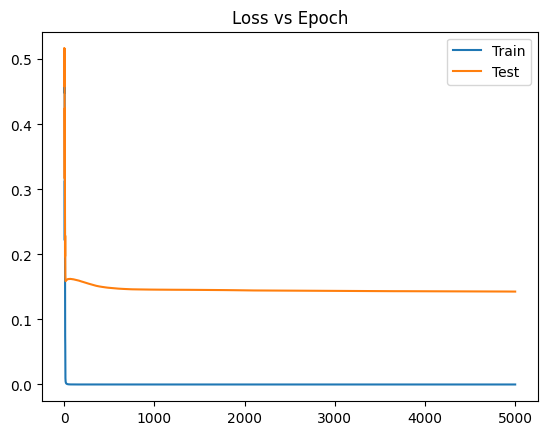

In [61]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(["Train", "Test"])
plt.title("Loss vs Epoch")
plt.show()

# Learning rate

C:\Users\Asus\AppData\Local\Temp\ipykernel_12536\3748346337.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


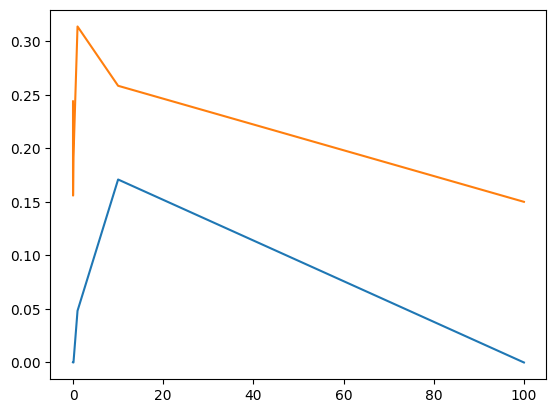

In [63]:
lrs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train = []
test = []

for lr in lrs :
    nn = ShallowNN(input_size = 8, hidden_size = 1000, output_size = 2)
    train_loss, test_loss = nn.fit(X_train, X_test, y_train, y_test, epochs = 5000, lr = lr, display = False)

    train.append(train_loss[-1])
    test.append(test_loss[-1])

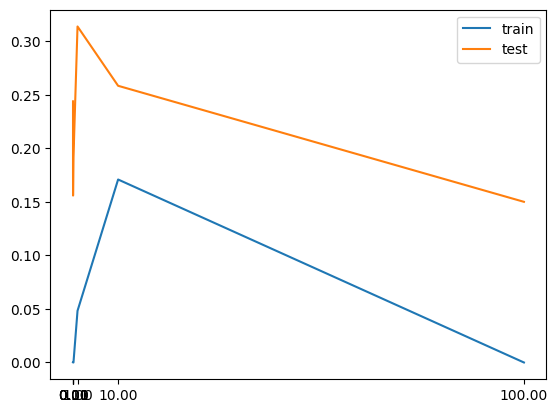

In [65]:

plt.plot(lrs, train)
plt.plot(lrs, test)
plt.xticks(lrs)
plt.legend(["train", "test"])
plt.show()

##### As we can see increasing the `learning_rate` causes the network to have higher loss but using lower ones but with more epochs and not too much to get stuck in local minimum is optimnum

# Epochs

In [67]:
nn = ShallowNN(input_size = 8, hidden_size = 1000, output_size = 2)
train_loss, test_loss = nn.fit(X_train, X_test, y_train, y_test, epochs = 20000, lr = 0.1, display = False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12536\3748346337.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


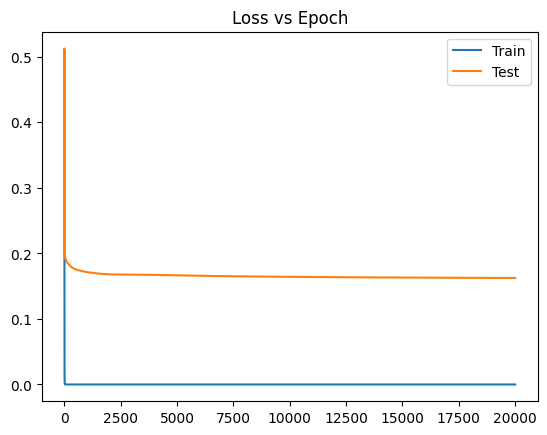

In [68]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(["Train", "Test"])
plt.title("Loss vs Epoch")
plt.show()

##### We can see that generally increasing the number of `epochs` results in better performance, unless its too much that results in overfitting, however if the data is not too scattered and has a simple structure, overfitting might happend later in comparison to average datasets